# day 276

# Anova vs Regression:

![fsfsf](41_r_0.png)
![fsfsf](41_r_1.png)
![fsfsf](41_r_2.png)
![fsfsf](41_r_3.png)
![fsfsf](41_r_4.png)
![fsfsf](41_r_5.png)
![fsfsf](41_r_6.png)
![fsfsf](41_r_7.png)

## 5 model building principles:
* step1: build the equation(s) underlying the system.
* step2: fit the data into the model's equations.
* step3: form the matrix-vector equation Ax = B.
* step4: compute the parameters.
* step5: Do statistical Evaluation.




## references to least square section in linear algebra:
* please refer least square section in linear algebra for more deeper understanding.

## The intercept in the equation:
* intercept is a fixed component of the model. in the equation y=mx+c. c is the intercept. the depedent variable(y) must be equal to c when the x is 0.
* that is to say what the outcome of our model will be when all the parameters/scalers/coefficients of x we used in the model do not contribute much.
* Outcome when parameters have minimal contribution: When the coefficient of x (m) is small, indicating a weak relationship between x and y, the impact of x on y is reduced. In such cases, the intercept (c) plays a more significant role in determining the predicted value of y.

## what are General Linear Models(GLM) and non-linearities?
* Annova, Regression, and correlation are all Linear models.
* Linear means the models involve scaler multiplication and addition(linear computation).
* log, entropy, polynomial with powers >=2 , trignometric etc..... are all non-linear models


## nonlinearity is not acceptable in the regression model:
![fsdfs](41_r_8.png)

# left inverse to compute beta:

![fsdfs](41_r_9.png)
![fsdfs](41_r10.png)
![fsdfs](41_r11.png)
![fsdfs](41_r12.png)
![fsdfs](41_r13.png)

## multicollinearity:
* multicollinearity is having linearly dependent columns in the matrix.
* if we have multicollinearity in the matrix then we won't get sufficient rank for the matrix to calculate its inverse. if we can't calculate the inverse then we won't get the solution for beta.
* so, it is essential to ensure that the matrix doesn't have any multicollinearity.

In [7]:
# computing coefficients/beta:
import numpy as np

# full row rank matrix
matrix = np.random.randint(1,9,(3,7))

print('Rank of the matrix is: ', np.linalg.matrix_rank(matrix))

# right inverse
right_inverse = np.linalg.inv(matrix@matrix.T)@(matrix@matrix.T)

right_inverse

Rank of the matrix is:  3


array([[ 1.00000000e+00, -4.44089210e-16, -7.77156117e-16],
       [-9.85322934e-16,  1.00000000e+00, -1.72431514e-15],
       [-4.85722573e-16, -2.63677968e-16,  1.00000000e+00]])

# day 279

# Evaluating Regression Models R^2 and F:

![fsdfsdf](8124_r1.png)
![sfsfsfs](8124_r2.png)

## notes:
* we don't know the how to interpret the r^2 i.e we cannot say it is a good model just because r^2 is 0.92, so we have this thing called F-score which gives us a sense of how good the R^2 actually is.

# how to find out if the achieved R^2 is good or bad: (it is via F-score)
![sfsfsfs](8124_r3.png)

## notes:
* The null hypothesis states that all the coefficients will be 0 (right from 1st coefficient till the kth coefficient) which means none of the parameters we chose to define the system actually works, no parameter is influencing the output of the system a least bit. this is what the null hypothesis assumes.
* The alternative hypothesis on the other hand assumes that atleast one of the coefficients(beta) will be non-zero influencing the output of the system we are trying define through our model.

# to calculate the F-score.
![sfsfsfs](8124_r4.png)

## notes:
* k is the number of betas or in other words number of parameters we used for the model to define the system. k includes the intercept and the coefficients. Do not leave the intercept from consideration.
* N is the total number of data points.
* F score calculates if there is any significant difference if any of the beta(parameter) makes than just getting the result by chance.

# to calculate the influence of individual beta(parameter):
![sfsfsfs](8124_r5.png)

## notes:
* t_{n-k} is the t score with n-k degrees of freedom we find for each individual beta divided by sqrt(sse/sst).

# simple Regression:

![sfsfsfs](8124_r6.png)
## notes:
* All simple regressions have exactly one depedent variable(y) and independent variables(excluding the intercept and errors variable)


## application:
![sfsfsfs](8124_r7.png)
![sfsfsfs](8124_r8.png)
![sfsfsfs](8124_r10.png)

## notes:
* for calculating the F score we took into both intercept and money spent parameters as number of features(k).
* p score of 0.06 indicates that the result is not statistically significant meaning number of hours a person slept does not statistically significantly predict how much money he would spend. it is because the instructor says that the sample size was too small to conclude anything, had the size of the sample been larger we could have made pretty decent stastically significant conclusion.

# day 282

In [26]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import scipy.stats as stats

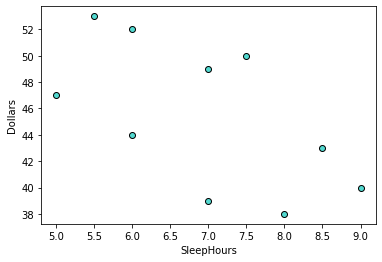

In [6]:
# Effects of sleep on money spent on food
SleepHours = [5,5.5,6,6,7,7,7.5,8,8.5,9]
Dollars = [47,53,52,44,39,49,50,38,43,40]

# plotting
plt.plot(SleepHours,Dollars,'ko',markerfacecolor='#52d9d0')
plt.xlabel('SleepHours')
plt.ylabel('Dollars')
plt.show()

In [18]:
# manual Regression via least squares fitting

# building the design matrix (the ones for intercept)
x = np.vstack((np.ones(len(SleepHours)),SleepHours)).T

# compute the beta parameters(regression and coefficients)
beta = np.linalg.lstsq(x,Dollars,rcond=None)[0]

# prediction
prediction = x@beta

# exploration, analysis and freethrows

In [11]:
x

array([[1. , 5. ],
       [1. , 5.5],
       [1. , 6. ],
       [1. , 6. ],
       [1. , 7. ],
       [1. , 7. ],
       [1. , 7.5],
       [1. , 8. ],
       [1. , 8.5],
       [1. , 9. ]])

In [15]:
beta

array([62.84737679, -2.49602544])

In [16]:
# normal method to find beta
np.linalg.solve(x.T@x,x.T@Dollars)

array([62.84737679, -2.49602544])

In [17]:
# left inverse method to find beta
np.linalg.inv(x.T@x) @ (x.T@Dollars)

array([62.84737679, -2.49602544])

In [27]:
# lets use scipy.stats to extract the same beta(intercept and slope is beta) 
stats.linregress(SleepHours,Dollars)

# conclusion: p value is > 0.05 so the prediction is not statistically singificant.

LinregressResult(slope=-2.4960254372019075, intercept=62.84737678855326, rvalue=-0.60181180055799, pvalue=0.06565432862149675, stderr=1.171098032136086, intercept_stderr=8.27055598001377)

In [19]:
prediction

array([50.3672496 , 49.11923688, 47.87122417, 47.87122417, 45.37519873,
       45.37519873, 44.12718601, 42.87917329, 41.63116057, 40.38314785])

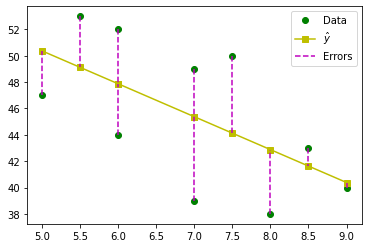

In [28]:
# plotting the actual and prediction and errors.

# plot actual
plt.plot(SleepHours,Dollars,'go')

# plot the prediction
plt.plot(SleepHours,prediction,'ys-')

# plot the errors
for i in range(len(SleepHours)):
    plt.plot([SleepHours[i],SleepHours[i]],[Dollars[i],prediction[i]],'m--')
    
plt.legend(('Data','$ \\hat{y} $','Errors'))
plt.show()

# unsupervised learning challenge:

## goals:

* Calculate R^2 
* Compute F-score values.


# $$ R^2 = 1- \frac{sse}{sst} =  1 - \frac{\sum{(y-\hat{y})^2}}{\sum{(y - \bar{y})^2}} $$

In [39]:
# sse
sse = np.sum((Dollars - prediction)**2)

# sst 
sst = np.sum((Dollars - np.mean(Dollars))**2)

# r^2
r_sq = 1 - sse/sst

print(r_sq)

0.3621774432908499


# exploration,analysis and freethrows

In [40]:
sse

In [41]:
sst

In [42]:
r_sq

In [44]:
r = np.sqrt(r_sq)
r # correlation

# $$ F-score(k-1,n-k) = \frac{\text{ssm}/(k-1)}{\text{sse}/(n-k)} $$

where,
# $$  ssm = \sum{(\hat{y}_i - \bar{y})^2} , sse = \sum{(y - \hat{y})^2} $$

In [78]:
# calculating F-score

# k - incerpt and sleep hours, n - total number of data points.
k = 2 
n = len(SleepHours)

# ssm
ssm = np.sum((prediction - np.mean(Dollars))**2)
sse = np.sum((Dollars - prediction)**2)

F_score = (ssm/(k-1)) / (sse/(n-k))

# exploration,analysis and freethrows

In [79]:
k

In [80]:
n

In [81]:
ssm

In [82]:
sse

In [83]:
F_score

# day 282,day 285

# Multiple Regression:

![fsfsfs](11124_stat1.png)

## notes:
* to establish interaction between two parameters we multiply them (p1 AND p2 ). in our example we multiplied number of hours slept with number of hours studied.

![fsdfsdf](150124_stat0.png)
![sfsfsdf](150124_stat1.png)
![sfsfsdf](150124_stat2.png)

## precise interpretation of beta in multiple regression:
![sfsdfsdf](150124_stat3.png)

## notes:
* to observe how the beta of a parameter in the model changes the model's output, we first keep all other parameters `constant` and change the beta of the parameter we are concerned by a small unit and observe the output of the model. 
* beta1 tells you how much sleep contributes to the dependent variable(exam score) and beta2 determines how much study hours influences the dependent variable and beta3 the interaction between sleep and study hours.
* beta is a scaler that scales the parameters based on the given data and how much each of the concerned parameter seem to contribute to the dependent variable.

# standardizing regression coefficients:

## the need for standardization
![sfsfsdf](150124_stat4.png)
![sfsfsdf](150124stat5.png)

## notes:
* Time is measured in different units than say calories one got from eating food so we need to have these values vary between a certain range (normally we would make them vary between 0 and 1), this technique is called scaling between ranges or min max scaling or uniformalization. some people prefer to call it normalization even though there is normalization(guassian distribution) going on with it, it is normal. it doesn't matter what we call it, does it? what truly matters is the technique we use to get different values.

## standardization and unstandardized versions of data:
![sfsfsdf](150124_stat5.png)
![sfsfsdf](150124_stat6.png)


## notes:
* Sometimes you standardize these scaled values to a standard unit seperated by a standard deviation. This technique is called standaridization or normalization. 
* The word 'stymie' means prevent or hurdle. The instructor wants to be flashy with his vocabulary I presume.
* My personal take on whether we should standardize or not is we should definitely standardize or scale the values before we begin to run the regression algorithm before we even begin to model it. The data needs to be scaled or normalized because the performance of the model depends on whether we scaled or normalized or not. Unstandardized/unscaled data would not help much the computer to find patterns between parameters and their individual contribution to the overall outcome(independent variable) as much as standardized/scaled data.  


## interpreting standardized beta coefficients:
![sfsfsdf](150124_stat7.png)

## Notes:
* how to interpret standardized beta coefficient value on dependent variable(output value)?. one standard deviation change in concerned beta equates to the stadard deviations of changes in the dependent variable when keeping all other parameters and coefficients constant. 

# day 288

# code 

In [61]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import pandas as pd

In [11]:
# preparing data:fake data.

exam_scores = []
for ei in range(5):
    exam_scores = np.hstack((exam_scores,60*np.ones(6)+np.linspace(-1,5,6)*ei))
    
hours_studied = np.tile(np.linspace(2,8,6),5)
avg_sleep_hours = np.linspace(6,10,30)

# exploration, analysis and freethrows

In [8]:
exam_scores

array([60. , 60. , 60. , 60. , 60. , 60. , 59. , 60.2, 61.4, 62.6, 63.8,
       65. , 58. , 60.4, 62.8, 65.2, 67.6, 70. , 57. , 60.6, 64.2, 67.8,
       71.4, 75. , 56. , 60.8, 65.6, 70.4, 75.2, 80. ])

In [3]:
np.ones(6)

array([1., 1., 1., 1., 1., 1.])

In [4]:
60*np.ones(6)

array([60., 60., 60., 60., 60., 60.])

In [10]:
hours_studied

array([2. , 3.2, 4.4, 5.6, 6.8, 8. , 2. , 3.2, 4.4, 5.6, 6.8, 8. , 2. ,
       3.2, 4.4, 5.6, 6.8, 8. , 2. , 3.2, 4.4, 5.6, 6.8, 8. , 2. , 3.2,
       4.4, 5.6, 6.8, 8. ])

In [13]:
np.linspace(2,8,6)

array([2. , 3.2, 4.4, 5.6, 6.8, 8. ])

In [14]:
np.tile(np.linspace(2,8,6),5)

array([2. , 3.2, 4.4, 5.6, 6.8, 8. , 2. , 3.2, 4.4, 5.6, 6.8, 8. , 2. ,
       3.2, 4.4, 5.6, 6.8, 8. , 2. , 3.2, 4.4, 5.6, 6.8, 8. , 2. , 3.2,
       4.4, 5.6, 6.8, 8. ])

In [12]:
avg_sleep_hours

array([ 6.        ,  6.13793103,  6.27586207,  6.4137931 ,  6.55172414,
        6.68965517,  6.82758621,  6.96551724,  7.10344828,  7.24137931,
        7.37931034,  7.51724138,  7.65517241,  7.79310345,  7.93103448,
        8.06896552,  8.20689655,  8.34482759,  8.48275862,  8.62068966,
        8.75862069,  8.89655172,  9.03448276,  9.17241379,  9.31034483,
        9.44827586,  9.5862069 ,  9.72413793,  9.86206897, 10.        ])

In [15]:
len(avg_sleep_hours),len(exam_scores)

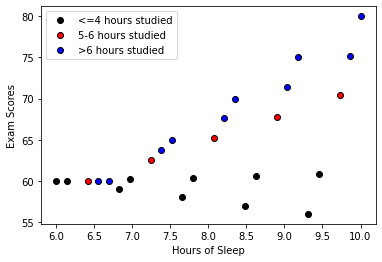

In [32]:
# plot the data

## stratify by the hours studied:

## fewer than 4 hours
plotidx = hours_studied <= 4
plt.plot(avg_sleep_hours[plotidx],exam_scores[plotidx],'ko',markerfacecolor='k',label='<=4 hours studied')

##  5-6 hours 
plotidx = np.logical_and(hours_studied >= 5, hours_studied <= 6)
plt.plot(avg_sleep_hours[plotidx],exam_scores[plotidx],'ko',markerfacecolor='r',label='5-6 hours studied')

## more than 6 hours
plotidx = hours_studied > 6
plt.plot(avg_sleep_hours[plotidx],exam_scores[plotidx],'ko',markerfacecolor='b',label='>6 hours studied')


plt.xlabel('Hours of Sleep')
plt.ylabel('Exam Scores')

plt.legend()
plt.show()


In [43]:
# multiple regression

x = np.vstack((np.ones((30,)),avg_sleep_hours,hours_studied,avg_sleep_hours*hours_studied)).T

# OLS stands for Ordinary Least squares
# endog stands for endogenenous variable
# exog stands for exogenous variable.
multireg = sm.OLS(endog=exam_scores,exog=x).fit() 
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1182.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           6.74e-28
Time:                        13:53:23   Log-Likelihood:                -21.269
No. Observations:                  30   AIC:                             50.54
Df Residuals:                      26   BIC:                             56.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.4315      1.700     48.491      0.000      78.937      85.926
x1            -3.4511      0.215    -16.087      0.000      -3.892      -3.010
x2            -7.6663      0.321    -23.916      0.000      -8.325      -7.007
x3             1.1736      0.040     29.623      0.000       1.092       1.255
==============================================================================
Omnibus:                       10.899   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.273
Skew:                          -0.438   Prob(JB):                        0.195
Kurtosis:                       1.640   Cond. No.                         821.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# exploration, analysis and freethrows

In [36]:
np.ones((30,))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
x

array([[ 1.        ,  6.        ,  2.        , 12.        ],
       [ 1.        ,  6.13793103,  3.2       , 19.64137931],
       [ 1.        ,  6.27586207,  4.4       , 27.6137931 ],
       [ 1.        ,  6.4137931 ,  5.6       , 35.91724138],
       [ 1.        ,  6.55172414,  6.8       , 44.55172414],
       [ 1.        ,  6.68965517,  8.        , 53.51724138],
       [ 1.        ,  6.82758621,  2.        , 13.65517241],
       [ 1.        ,  6.96551724,  3.2       , 22.28965517],
       [ 1.        ,  7.10344828,  4.4       , 31.25517241],
       [ 1.        ,  7.24137931,  5.6       , 40.55172414],
       [ 1.        ,  7.37931034,  6.8       , 50.17931034],
       [ 1.        ,  7.51724138,  8.        , 60.13793103],
       [ 1.        ,  7.65517241,  2.        , 15.31034483],
       [ 1.        ,  7.79310345,  3.2       , 24.93793103],
       [ 1.        ,  7.93103448,  4.4       , 34.89655172],
       [ 1.        ,  8.06896552,  5.6       , 45.1862069 ],
       [ 1.        ,  8.

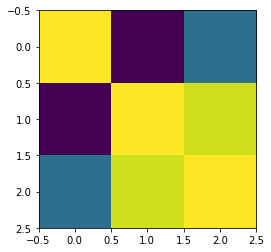

In [60]:
# observing the correlation of all independent variables.

plt.imshow(np.corrcoef(x[:,1:].T))# ignoring the intercept column
plt.show()

In [55]:
np.corrcoef(x[:,1:].T)

array([[1.        , 0.19731231, 0.49270769],
       [0.19731231, 1.        , 0.94068915],
       [0.49270769, 0.94068915, 1.        ]])

In [70]:
df = pd.DataFrame(x[:,1:],columns=['sleep_hours','study_hours','study_and_sleep'])
df

,sleep_hours,study_hours,study_and_sleep
0,6.000000,2.0,12.000000
1,6.137931,3.2,19.641379
2,6.275862,4.4,27.613793
3,6.413793,5.6,35.917241
4,6.551724,6.8,44.551724
5,6.689655,8.0,53.517241
6,6.827586,2.0,13.655172
7,6.965517,3.2,22.289655
8,7.103448,4.4,31.255172
9,7.241379,5.6,40.551724


# polynomials:

## what a polynomial equation looks like?
![ssdf](170124_stats.png)
![ssdf](170124_stats1.png)

## when would you use a polynomial regression?
![ssdf](170124_stats2.png)

## Notes:
* when the data is non-linear. you can't put a straight line through to fit the outcome.
*  you would use polynomial regression when the linear regression model does not fit the depedent variable with higher accuracy so squaring or cubing (polynomial operations) the independent variables might make the model fit the output(depedent variable) with higher accuracy. 
* **but the real question is how to choose the right degree? how to know whether to square one of the independent variable or cube or qudruple it? then how to know which independent variable to choose to raise its degree?**

## what degree to choose?
![sfsdfs](170124_stats3.png)
![fsfsd](170124_stats4.png)

* you increase the order too much then you risk overfitting. you keep the degrees at the lowest level say at 2 then you may underfit the curvy data.
* so, to know the right degree to use we have to use something called `Bayes Information Criterion(BIC)`. 
* the least value in `BIC plot` is the ideal degree of polynomials.

# polynomial Regression:

# day 290,day 292

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api  as sm

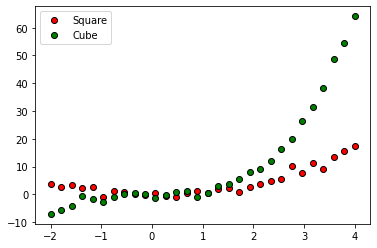

In [2]:
# generate the data
n = 30
x = np.linspace(-2,4,n)

y1 = x**2 + np.random.randn(n)
y2 = x**3 + np.random.randn(n)

# plotting
plt.plot(x,y1,'ko',markerfacecolor='r')
plt.plot(x,y2,'ko',markerfacecolor='g')
plt.legend(('Square','Cube'))

plt.show()

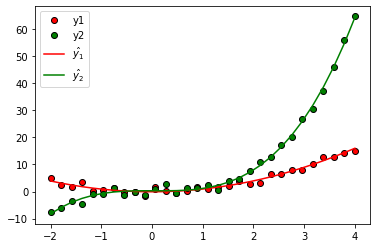

In [9]:
# now for a polynomial fit
beta = np.polyfit(x,y1,2)
yhat1 = np.polyval(beta,x)

beta = np.polyfit(x,y2,3)
yhat2 = np.polyval(beta,x)

# all the plotting
plt.plot(x,y1,'ko',markerfacecolor='r',label='y1')
plt.plot(x,y2,'ko',markerfacecolor='g',label='y2')

plt.plot(x,yhat1,'r',label='$ \hat{y_1} $')
plt.plot(x,yhat2,'g',label='$ \hat{y_2} $')

plt.legend()
plt.show()

# exploration, analysis and freethrows

In [10]:
beta # order is: x**3, x**2, x**1, intercept

array([ 1.03083017, -0.10947012, -0.07287201,  0.27484521])

# use of bayes information criterion: 
* in the code above we knew what polynomial order we used for the creation of those functions y1 and y2 but in reality when you look at a equation in the wild this would not be often the case: you would not know what order of polynomial degree might fit the model well hence comes the Bayes information criterion

In [3]:
# computer r^2 for several polynomial orders
orders = np.arange(1,6)

# output matrices
r2_matrix = np.zeros((2,len(orders)))
sse_matrix = np.zeros((2,len(orders)))

for i in range(len(orders)):
    # for y1
    beta = np.polyfit(x,y1,orders[i])
    y_hat1 = np.polyval(beta,x)
    sse = sum((y1-y_hat1)**2)
    sst = sum((y1-np.mean(y1))**2)
    r2_matrix[0,i] = 1 - (sse/sst)
    sse_matrix[0,i] = sse
    
    # do the same for y2
    beta = np.polyfit(x,y2,orders[i])
    y_hat2 = np.polyval(beta,x)
    sse = sum((y2-y_hat2)**2)
    sst = sum((y2-np.mean(y2))**2)
    r2_matrix[1,i] = 1 - (sse/sst)
    sse_matrix[1,i] = sse

# exploration, analysis and freethrows

In [27]:
r2_matrix

array([[0.59126704, 0.96549973, 0.96634315, 0.96634333, 0.96817395],
       [0.7197538 , 0.93403056, 0.99676927, 0.99694648, 0.99694862]])

In [28]:
sse_matrix

array([[ 269.275446  ,   22.72896067,   22.17330895,   22.17319348,
          20.96717245],
       [2862.90254946,  673.92199473,   33.00412015,   31.19375118,
          31.17188097]])

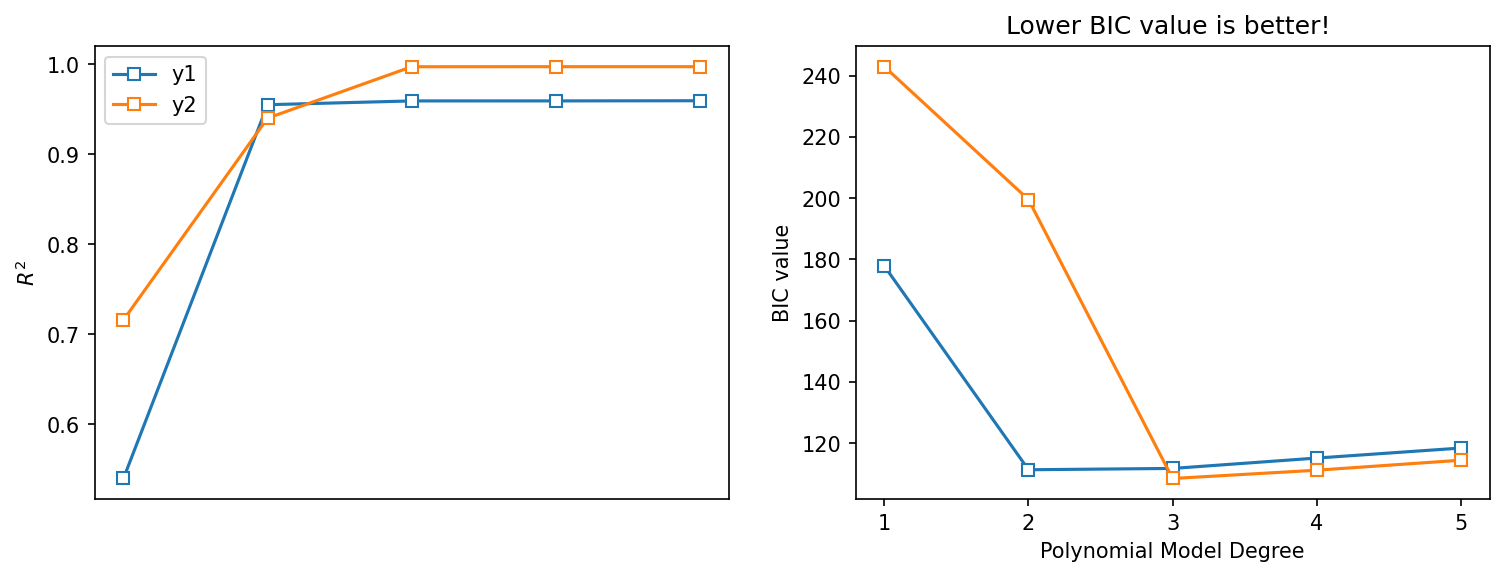

In [4]:
# finding the right order using BIC:Bayes Information Criterion
fig,ax = plt.subplots(1,2,dpi=150,figsize=(12,4))

ax[0].plot(orders,r2_matrix[0,:],'s-',markerfacecolor='w')
ax[0].plot(orders,r2_matrix[1,:],'s-',markerfacecolor='w')
ax[0].set_ylabel('$R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1','y2'))


# compute the Bayes Information Criterion
bic = n*np.log(sse_matrix) + orders*np.log(n)
ax[1].plot(orders,bic[0,:],'s-',markerfacecolor='w')
ax[1].plot(orders,bic[1,:],'s-',markerfacecolor='w')
ax[1].set_xticks(range(1,6))
ax[1].set_xlabel('Polynomial Model Degree')
ax[1].set_ylabel('BIC value')
ax[1].set_title('Lower BIC value is better! ')

plt.show()

# exploration, analysis and freethrows

In [23]:
bic

array([[171.27324194, 100.51159212, 103.17027012, 106.57131127,
        108.29472684],
       [274.88857713, 273.63935923, 277.19770222, 280.59878173,
        284.00624338]])

# Unsupervised Learning challenge:

## objective: 
1. prove (beta = np.polyfit(x,y)) is == (beta = np.linalg.inv(design_mat.T@design_mat) @ (design_mat@y)
2. prove (y_hat = np.polyval(beta,x) is == (y_hat = design_mat @ beta)

## goals:
1. create the design matrix without using polyfit and polyval.
   * in the first column put x^2 and second column will have x^1 and the third column of the design matrix will have intercepts.
2. and create the same solution as in the above code
   * now instead of using np.polyval to calculate y_hat, we have to use design_mat@beta
3. confirm they are both equal.

In [39]:
n = 100
x = np.linspace(-np.pi,np.pi,n)
y1 = x**2 + np.random.randn(n)
y1 = y1.reshape((len(y1),1))

# create the design matrix without using polyfit and polyval
design_mat = np.concatenate(((x**2).reshape(len(x),1),(x**1).reshape(len(x),1),np.ones((len(x),1))),
                           axis=1)

# find the beta
man_beta= np.linalg.solve(design_mat.T@design_mat,design_mat.T@y1)

print('\n Manual Beta vs np.polyfit Beta')
display(man_beta,np.polyfit(x,y1,2))

# calculating y_hat
man_y_hat = design_mat@man_beta

print('\n Manual y_hat np.polyval y_hat: ')
display(man_y_hat[:10],np.polyval(np.polyfit(x,y1,2),x)[:10])




 Manual Beta vs np.polyfit Beta


array([[ 1.03357503],
       [-0.00115436],
       [-0.15815533]])

array([[ 1.03357503],
       [-0.00115436],
       [-0.15815533]])


 Manual y_hat np.polyval y_hat: 


array([[10.04644787],
       [ 9.63837717],
       [ 9.23863295],
       [ 8.84721521],
       [ 8.46412395],
       [ 8.08935916],
       [ 7.72292086],
       [ 7.36480903],
       [ 7.01502368],
       [ 6.67356481]])

array([10.04644787,  9.63837717,  9.23863295,  8.84721521,  8.46412395,
        8.08935916,  7.72292086,  7.36480903,  7.01502368,  6.67356481])

# exploration, analysis and freethrows

In [27]:
x

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [29]:
y1[:10]

array([[10.70779162],
       [ 9.3700983 ],
       [ 8.27130071],
       [ 9.56840064],
       [ 7.79719641],
       [ 8.3192416 ],
       [ 7.16907047],
       [ 8.21088417],
       [ 6.1658715 ],
       [ 7.82631651]])

In [30]:
beta = np.polyfit(x,y1,2)
beta

array([[ 1.03086264],
       [ 0.019941  ],
       [-0.04350588]])

In [18]:
np.concatenate(((x**2).reshape(len(x),1),(x**1).reshape(len(x),1),np.ones((len(x),1))),axis=1)[:10]

array([[ 9.8696044 , -3.14159265,  1.        ],
       [ 9.47486051, -3.07812614,  1.        ],
       [ 9.08817261, -3.01465962,  1.        ],
       [ 8.70954071, -2.9511931 ,  1.        ],
       [ 8.3389648 , -2.88772658,  1.        ],
       [ 7.9764449 , -2.82426006,  1.        ],
       [ 7.62198099, -2.76079354,  1.        ],
       [ 7.27557308, -2.69732703,  1.        ],
       [ 6.93722117, -2.63386051,  1.        ],
       [ 6.60692526, -2.57039399,  1.        ]])

In [23]:
y1.reshape((len(y1),1)).shape

In [24]:
design_mat.shape

# day 292,day 294,day296

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

# Logistic Regression

## notes:
1. it helps you to `classify` different patterns in the data: so the patterns become more distinguishable.
-----------
2. logistic regression is also known as 'binary logistic regression'.
-----------
3. The word 'logistic' is attributable to the fact that logistic regression deals with equations that have two dependent variables(2 outputs) such as 'yes' or 'no', 'True' or 'False', 'killer' or 'no-killer', 'wife' or 'not wife', 'she bears my baby' or "she bears someone else's baby" you get the idea? ... the output is binary or logical hence the name logistic(logical). But you know, you can also call it `Binary Regression`, this is more fitting.
--------
4. you can also extend this classification to more than 2 dependent variables, in which case we would call it `multinomial logistic regression` a quick side note: in deep learning implementations we use CategoricalCrossEntropyLoss or SparseCategoricalCrossEntropy() for multi-class classifications, and BinaryCrossEntropy() for classificaition of 2 objects.
--------
5. logistic regression or multinomial logistic regression return values in probabilities. so, if you are doing a logistic regression(binary) then you would get values between 0 and 1. if the value falls below 0.5 then it is one class of two classes if the value falls above 0.5, it is another class of 2 classes. a quick tangent note: we use `sigmoid or softmax` functions to get the numbers from Binary cross entropy loss and categorical cross entropy loss converted into probabilities respectively.

## setting up the equation:
![fsdfsd](220124_stats1.png)

## notes;
* in any equation setting up the beginning is more important so pay special attention to it. for example in this case why they chose to use natural log of probability of the event happening / probability of the event not happenning = y_hat? 
* i think it is because y_hat is a predictor in the case of linear regression it predicted where the continuous value such as price or sales count or anything would fall in the chart with respect to its past data, but in the case of classification it is either the 'the event happening' or 'the event not happening' so we take this p/(1-p).


## why take log though?
![sfsfs](240124_stat.png)

## notes:
* notice that without log, p/(1-p) ratio just gives a flat line, the log makes it dynamically change between a certain range hence would give a sense of getting closer to ideal point in optimization problems.

## how to find the values for beta? (hint: gradient descent)
![sfsfs](240124_stat1.png)

## notes:
* we cannot perform left inverse as with linear regression because here the equation is 1/1-e^{XB} is non-linear. 
* beta parameters are initially set with some random values and slowly updated iteratively to match closer to the actual output using gradient descent and calculated probability is updated.

## Logistic regression is sigmoid function:
# $$ \text{sigmoid} = \frac{1}{1 + e^{-x}} $$

##  softmax function:
* suppose we had multiple classes then we would use softmax function.
# $$ \text{softmax } =  f_i(a) = \frac{e^{a_i}}{\sum_k e^{a_k} } $$


## an example where logistic regression is used:
![sfsfs](240124_stat2.png)
![sfsfs](240124_stat3.png)
![sfsfs](240124_stat4.png)


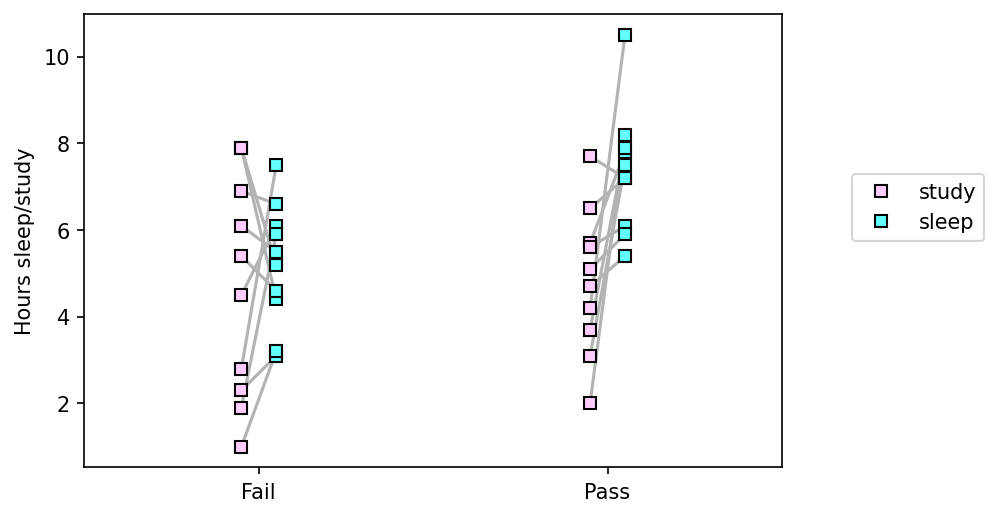

In [2]:
# code Logistic regression:

## generate the data
exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1];
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7, 5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8, 6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]

n = len(exam_outcome)

## plotting

## drawing the grey connecting lines
plt.figure(dpi=150)
for i in range(n): 
    plt.plot([exam_outcome[i]-0.05,exam_outcome[i]+0.05],[study_hours[i],sleep_hours[i]],color=[0.7,0.7,0.7])

## plotting study and sleep with exam_outcomes:
plt.plot(exam_outcome-0.05*np.ones(n),study_hours,'ks',markerfacecolor=[1,0.8,1],label='study')
plt.plot(exam_outcome+0.05*np.ones(n),sleep_hours,'ks',markerfacecolor=[0.39,1,1],label='sleep')

## decorating the plot:
plt.xticks([0,1],labels=('Fail','Pass'))
plt.xlim([-0.5,1.5])
plt.ylabel('Hours sleep/study')

plt.legend(loc=(1.1,0.5))
plt.show()

# exploration, analysis and freethrows

In [4]:
len(exam_outcome),len(study_hours),len(sleep_hours)

In [19]:
# now do the logistic regression:
log_reg = LogisticRegression(solver='newton-cg') #newton cg method

# creating the design matrix
design_matrix = np.vstack((study_hours,sleep_hours)).T

# fitting the design_matrix and the outcome with the logistic regression model
log_reg.fit(design_matrix,np.array(exam_outcome))

# display the intercept and the beta(coefficients)
print('Beta are: ',log_reg.coef_)
print('Intercept is: ',log_reg.intercept_)

Beta are:  [[0.10794965 1.05178489]]
Intercept is:  [-7.1649154]


In [20]:
print("Evaluation: ",log_reg.score(design_matrix,np.array(exam_outcome)))

Evaluation:  0.75


In [21]:
# making the classification report
prediction = log_reg.predict(design_matrix)
pred_prob = log_reg.predict_proba(design_matrix)
actual = np.array(exam_outcome)
class_names = ['Failed','Passed']
cm = confusion_matrix(actual,prediction)

print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



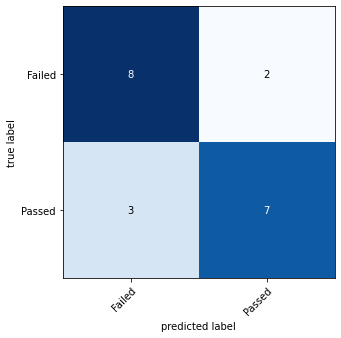

In [22]:
# plotting a confusion_matrix
plot_confusion_matrix(cm,
                     class_names=class_names,
                     figsize=(10,5))
plt.show()

# exploration,analysis and freethrows

In [14]:
prediction[:10],actual[:10]

(array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

array([[7, 3],
       [3, 7]], dtype=int64)

# day 297

# UnderFitting and OverFitting:

## why overfitting is bad?
![fsdfsdf](270124_stat.png)

## notes:
* overfitting makes the model underperform with unseen data.
* overfitting makes the model less generalizable or not all generalizable to unseen data.
* Tangent Note: one common solution to resolve overfitting is by using regularization technique like lasso regression


## why underfitting is bad?
![fsdfsdf](270124_stat1.png)

## notes:
* underfitting is when the model doesn't represent the reality(data) as it is due to less data or a less complex model with less parameters or some other reason.
* Tangent Note: one common solution to resolve underfitting is giving more data and adding more parameters.


## Summary of overfitting and underfitting:
![fsdfsdf](270124_stat2.png)


## Researchers degree of freedom:
![fsdfsdf](270124_stat3.png)
![fsdfsdf](270124_stat4.png)


## notes:
* Researcher's degree of freedom is researcher having many options on how to clean, organize, conduct analysis on the data.
* the best practise is to take only 10% or 20% of the whole data and perform exploration, analysis and freethrows on them and then building a pipeline as to how to clean, what charts to pull out,  deciding whether to use Python or R or Matlab, and so on and on and on...


## summary of the whole:
* Don't overfit or underfit the data. find a middle ground for generalizability.
* always work with a small portion of the total data, say 10% of the data, 
* and build a pipeline(blueprint that underpins the steps of the analysis) 
* and whenever you deviate from the pipeline make a note of it and let your reader know why you have deviated. 
* and slowly apply the model you've built for the 20% and make some changes if need be and apply it to 50% and finally to 100% 
* it is similar to writing a pseudo code about how to build the algorithm to solve the particular problem and then making some changes to pseudo code as and when the problem evolves and writing a remark about why you have not considered solving the problem that way in the beginning itself. it is journal, planout, and update the plan, repeat.

# day 300

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# unsupervised learning:

![sfsfs](270124_stat5.png)
## goals:
* just try to recreate the plot above.
* create an artificial training and testing dataset.
* plot the training dataset.
* first create a simple model with 2 parameters and make it run over the training data.
* then create another model with 10 parameters that overfits on the training data.
* check the accuracy of the training and testing data now.
* plot the testing data
* test the model with 2 parameters on the testing data.
* check the accuracy of the training data and testing data now.

C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


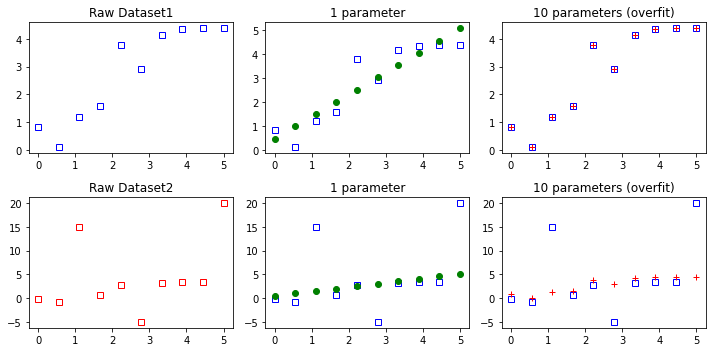

In [136]:
##  prepare datasets
n = 10
x = np.linspace(0,5,n)
y = x + np.random.randn(len(x))
dataset1 = pd.DataFrame({'x':x,'y':y})
y = y - 1 # shifting by -1 to make the overfitting model stagger a bit.
y[[5,2,9]] = [-5,15,20] # giving some random values manually.
dataset2 = pd.DataFrame({'x':x,'y':y})

## plot the training dataset
fig,ax = plt.subplots(2,3,figsize=(10,5))
ax[0][0].plot(dataset1['x'],dataset1['y'],'bs',markerfacecolor='w')
ax[0][0].set_title('Raw Dataset1')
      
## computing the prediction for dataset1
beta1 = np.polyfit(dataset1['x'],dataset1['y'],1)
y_hat1 = np.polyval(beta1,dataset1['x'])
ax[0][1].plot(dataset1['x'],dataset1['y'],'bs',markerfacecolor='w')
ax[0][1].set_title('1 parameter')
ax[0][1].plot(dataset1['x'],y_hat1,'go')

beta10 = np.polyfit(dataset1['x'],dataset1['y'],10)
y_hat10 = np.polyval(beta10,dataset1['x'])
ax[0][2].plot(dataset1['x'],dataset1['y'],'bs',markerfacecolor='w')
ax[0][2].set_title('10 parameters (overfit)')
ax[0][2].plot(dataset1['x'],y_hat10,'r+')


ax[1][0].plot(dataset2['x'],dataset2['y'],'rs',markerfacecolor='w')
ax[1][0].set_title('Raw Dataset2')

## computing the prediction for dataset1(unseen data)
ax[1][1].plot(dataset2['x'],dataset2['y'],'bs',markerfacecolor='w')
ax[1][1].set_title('1 parameter')
ax[1][1].plot(dataset2['x'],y_hat1,'go')

ax[1][2].plot(dataset2['x'],dataset2['y'],'bs',markerfacecolor='w')
ax[1][2].set_title('10 parameters (overfit)')
ax[1][2].plot(dataset2['x'],y_hat10,'r+')


plt.tight_layout()
plt.show()

# conclusion:

* overfitting with training data makes the prediction on unseen data terrible.

# exploration, analysis and freethrows

In [73]:
x

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [92]:
beta1 = np.polyfit(dataset1['x'],dataset1['y'],1)
beta1

array([2.12571429, 0.88571429])

In [93]:
y_hat1 = np.polyval(beta1,dataset1['x'])
y_hat1

array([ 0.88571429,  1.44511278,  2.00451128,  2.56390977,  3.12330827,
        3.68270677,  4.24210526,  4.80150376,  5.36090226,  5.92030075,
        6.47969925,  7.03909774,  7.59849624,  8.15789474,  8.71729323,
        9.27669173,  9.83609023, 10.39548872, 10.95488722, 11.51428571])

In [128]:
y[[1,2,3]]

array([-0.36262318, 23.        ,  2.53521081])

# day 301

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
import matplotlib.pyplot as plt
import scipy.stats as stats

# comparing nested models


## how to compare different models of the same data quantitatively?
![sdfsd](310124_stats.png)
![sdfsd](310124_stats1.png)

## notes:
* model1 is within the model2 because all the parameters and coefficients of the model1 are present in model2. so model1 is a reduced model and model2 is a full model.

## model with more parameters always and always perform better:

![sdfsf](310124_stats2.png)

## notes:
* it is true that models with more parameters will perform better than model with lesser parameters or full model will perform better than reduced models but there is a catch.
* the catch is compute time and memory(space and time complexity), models with more parameters will significantly take more compute and memory so an optimization ruler such as a cost function is attached to penalize the model with more parameters to allow only those parameters with the model that significantly improve the performance of the model.
* this cost function is done by sse and a F-test performed on the reduced and the full model.

## Ftest (a battle to choose either full model or reduced model):
![sdfsd](310124_stats3.png)

## notes:
* n is the total number of data points 

## full model or reduced model:
![sdfsd](310124_stats4.png)
![sdfsd](310124_stats5.png)

## notes:
* if the f test gives statistically significant value then choose the full model with all its parameters
* if the f test gives statistically non-significant value then choose the reduced model with few parameters. which indicate that the addition of additional parameters didn't help much to increase the model's predictive power.
* null hypothesis is no parameter from the full model improves the performance.
* alternate hypothesis is atleast one parameter from the full model improves the performance.

## conclusion:
* compute the ANOVA table and F-test with the help of a computer. Manually it is tedious.


# what to do about the missing datapoints in the dataset?
![fsdfsfs](310124_stats6.png)

## ways to handle with missing data:

## 1. complete removal
![fsdfsfs](310124_stats7.png)
* remove the entire row.
* do this when the data are paired meaning data in one column cannot have its meaning without depending on the missing value.

## 2. selective removal
![fsdfsfs](310124_stats8.png)
* remove only the box where data is missing. Don't do this method. do this only if there are many missing values or the number of datapoints are too few. 


## 3. replace the missing boxes with apt values.
![fsdfsfs](310124_stats9.png)
* sometimes replace it with mean of the other values in the column 
* sometimes just put 0 in their places.
* sometimes put nill/null or whatever that makes sense.

## 4. replace with predicted value.
![fsdfsfs](310124_stats10.png)
* this method is more interesting 
* you treat the available column values lets say Time1 as the training dataset and Time2 as the Testing dataset and create the deep learning or statistical model to train it with the training data 
* replace the value the model gives in the corresponding position of the missing data.
* one thing to be wary of with this approach is you need to have lot of features not just Time1 as in our case to train the model. if you happen to have only with one feature then replace the missing compartment with just the meanvalue or 0 

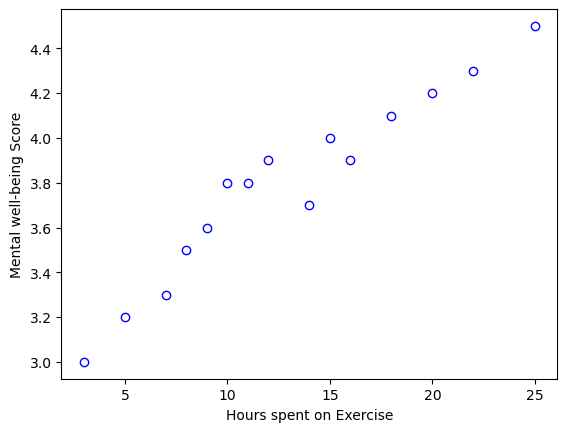

In [10]:
# Amity course on regression
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import scipy.stats as stats


x = [5,8,10,12,15,3,20,18,14,16,7,22,25,9,11]
y = [3.2,3.5,3.8,3.9,4,3,4.2,4.1,3.7,3.9,3.3,4.3,4.5,3.6,3.8]
plt.plot(x,y,'bo',markerfacecolor='white')
plt.xlabel('Hours spent on Exercise')
plt.ylabel('Mental well-being Score')
plt.show()

In [8]:
stats.linregress(x,y)

LinregressResult(slope=0.06302816901408449, intercept=2.967300469483568, rvalue=0.9621690763713291, pvalue=1.0229864000134127e-08, stderr=0.004949978422164084, intercept_stderr=0.07119484748996881)